In [72]:
import pandas as pd

In [73]:
!wget -q https://github.com/datasciencedojo/datasets/raw/master/titanic.csv

Now that the dataset is downloaded, I'll load it into a pandas DataFrame and start with some basic EDA.

In [74]:
data = pd.read_csv("titanic.csv")
print(data.head())
print(data.info())
print(data.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [75]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [76]:
mean_age = data['Age'].mean()
data['Age'].fillna(mean_age, inplace=True)
print(data['Age'].isnull().sum())

0


In [77]:
data.drop('Cabin', axis=1, inplace=True)
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [78]:
mode_embarked = data['Embarked'].mode()[0]
data['Embarked'].fillna(mode_embarked, inplace=True)
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## Visualize the distribution of 'survived'

### Subtask:
Create a count plot to see the number of passengers who survived and who did not.

**Reasoning**:
Create a count plot of the 'Survived' column to visualize the distribution of survival.

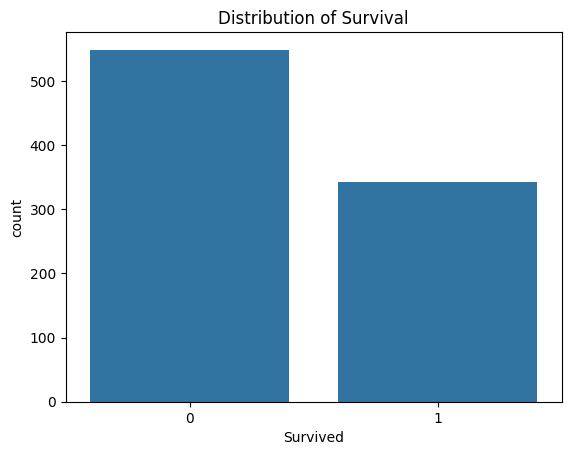

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=data)
plt.title('Distribution of Survival')
plt.show()

## Visualize the distribution of other categorical features

### Subtask:
Create count plots for 'Pclass', 'Sex', and 'Embarked' to see the distribution of passengers within these categories.

**Reasoning**:
Create count plots for 'Pclass', 'Sex', and 'Embarked' to visualize their distributions.

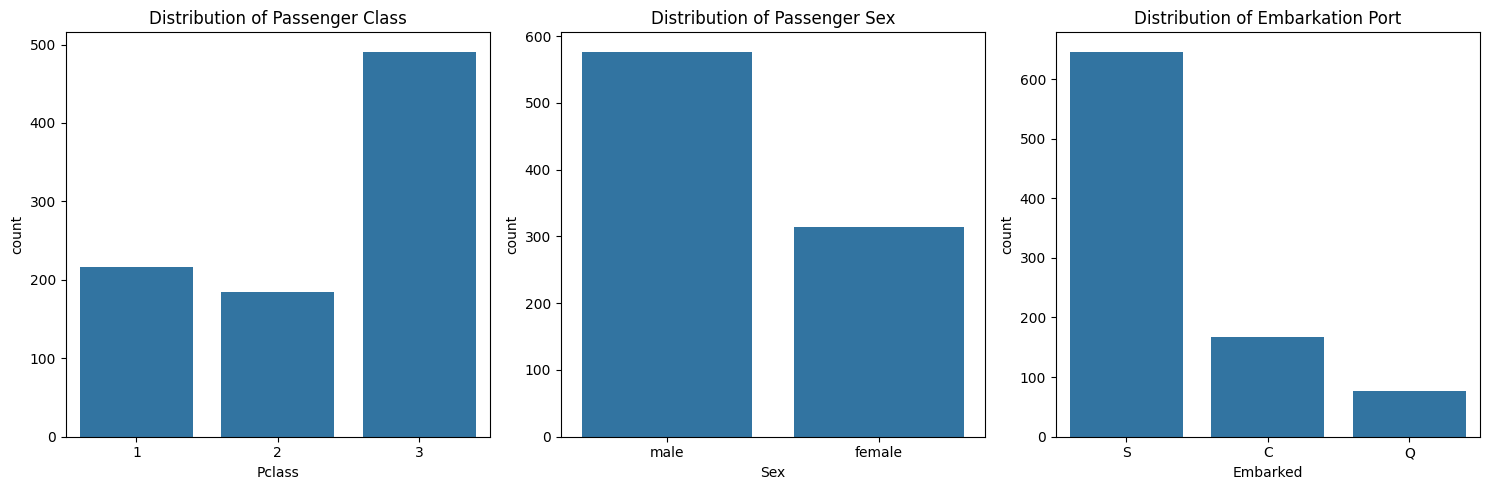

In [81]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='Pclass', data=data)
plt.title('Distribution of Passenger Class')

plt.subplot(1, 3, 2)
sns.countplot(x='Sex', data=data)
plt.title('Distribution of Passenger Sex')

plt.subplot(1, 3, 3)
sns.countplot(x='Embarked', data=data)
plt.title('Distribution of Embarkation Port')

plt.tight_layout()
plt.show()

## Visualize the relationship between categorical features and 'Survived'

### Subtask:
Create count plots to see the survival rate for different categories in 'Pclass', 'Sex', and 'Embarked'.

**Reasoning**:
Create count plots with the 'Survived' hue to visualize the relationship between categorical features and survival.

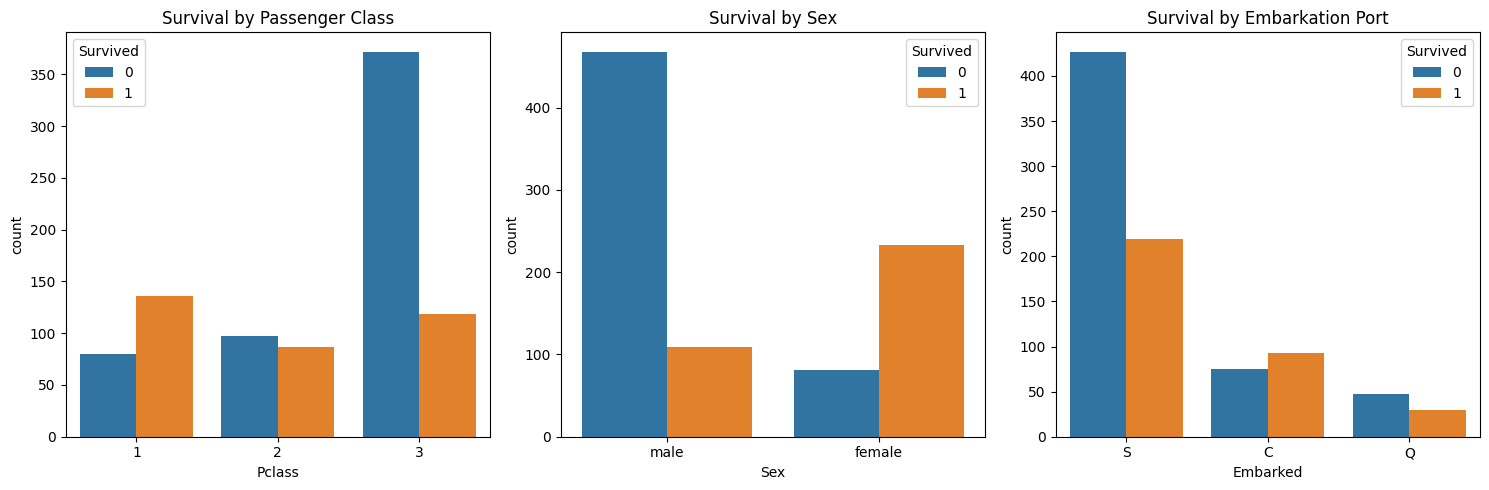

In [82]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival by Passenger Class')

plt.subplot(1, 3, 2)
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival by Sex')

plt.subplot(1, 3, 3)
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.title('Survival by Embarkation Port')

plt.tight_layout()
plt.show()

## Visualize the distribution of numerical features

### Subtask:
Create histograms for 'Age' and 'Fare' to see their distributions.

**Reasoning**:
Create histograms for 'Age' and 'Fare' to visualize their distributions.

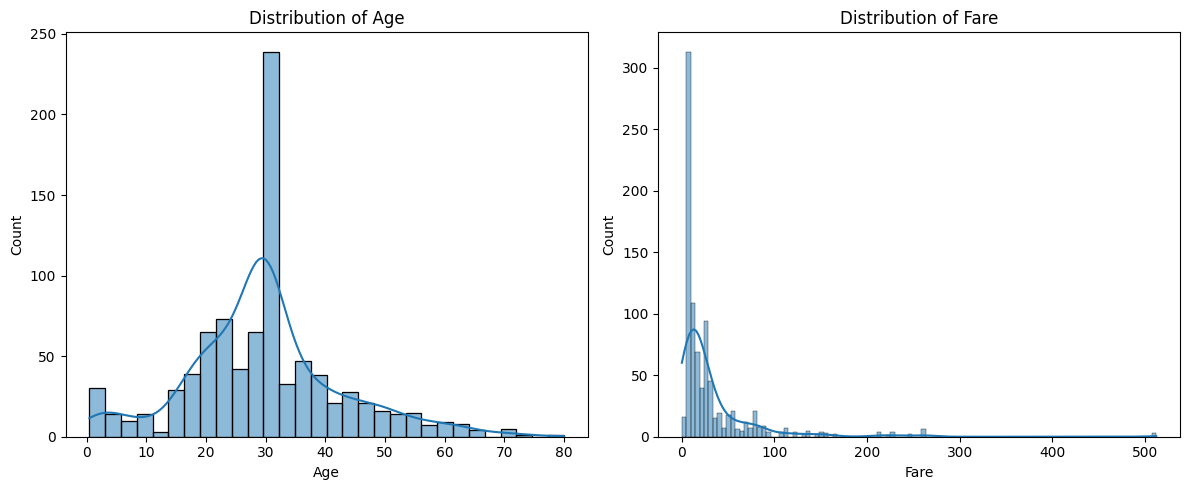

In [83]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
sns.histplot(data['Fare'], kde=True)
plt.title('Distribution of Fare')

plt.tight_layout()
plt.show()

## Visualize the relationship between numerical features and 'Survived'

### Subtask:
Create visualizations (e.g., box plots or violin plots) to see how 'Age' and 'Fare' relate to survival.

**Reasoning**:
Create box plots for 'Age' and 'Fare' with the 'Survived' hue to visualize the relationship between numerical features and survival.

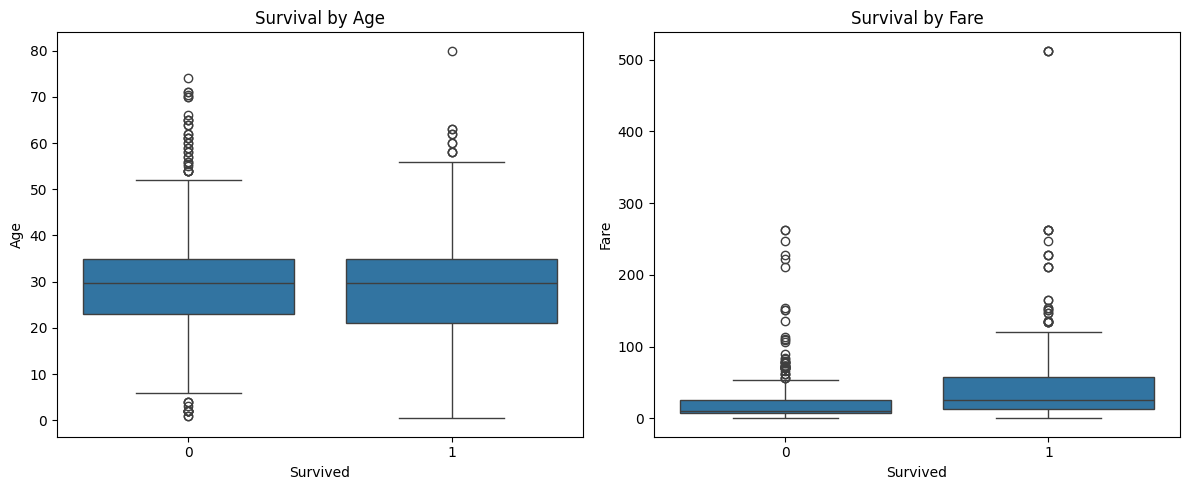

In [84]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Survival by Age')

plt.subplot(1, 2, 2)
sns.boxplot(x='Survived', y='Fare', data=data)
plt.title('Survival by Fare')

plt.tight_layout()
plt.show()

## Explore Categorical Variables

### Subtask:
Analyze the unique values and frequencies of categorical columns like 'Sex', 'Embarked', and 'Pclass'.

**Reasoning**:
I will use the `value_counts()` method to display the unique values and their frequencies for 'Sex', 'Embarked', and 'Pclass'.

In [85]:
print("Value counts for Sex:")
print(data['Sex'].value_counts())
print("\nValue counts for Embarked:")
print(data['Embarked'].value_counts())
print("\nValue counts for Pclass:")
print(data['Pclass'].value_counts())

Value counts for Sex:
Sex
male      577
female    314
Name: count, dtype: int64

Value counts for Embarked:
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

Value counts for Pclass:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


## Identifying Outliers

### Subtask:
Visualize potential outliers in numerical columns using box plots.

**Reasoning**:
Create box plots for 'Age', 'Fare', 'SibSp', and 'Parch' to visually identify potential outliers.

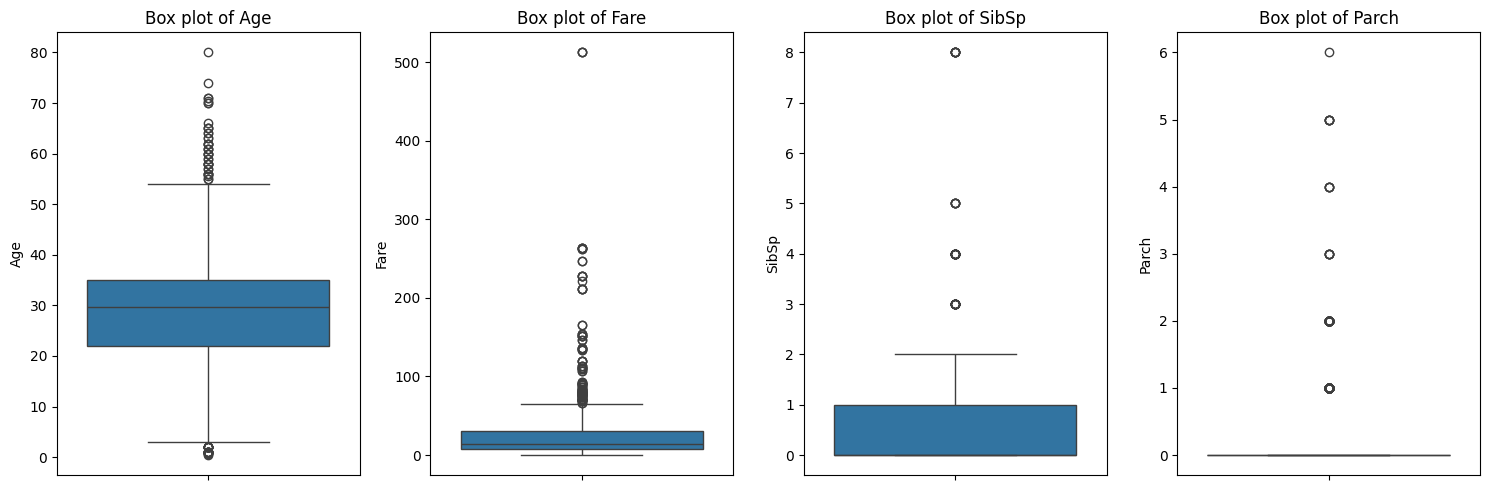

In [86]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
sns.boxplot(y='Age', data=data)
plt.title('Box plot of Age')

plt.subplot(1, 4, 2)
sns.boxplot(y='Fare', data=data)
plt.title('Box plot of Fare')

plt.subplot(1, 4, 3)
sns.boxplot(y='SibSp', data=data)
plt.title('Box plot of SibSp')

plt.subplot(1, 4, 4)
sns.boxplot(y='Parch', data=data)
plt.title('Box plot of Parch')


plt.tight_layout()
plt.show()

# Task
Prepare the "titanic.csv" dataset for machine learning models by performing feature engineering, encoding categorical variables, scaling numerical features, and splitting the data into training and testing sets.

## Feature engineering

### Subtask:
Create new features from existing ones that might be useful for the model.


**Reasoning**:
Create the 'FamilySize' and 'IsAlone' features.



In [87]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)
display(data[['SibSp', 'Parch', 'FamilySize', 'IsAlone']].head())

,SibSp,Parch,FamilySize,IsAlone
0,1,0,2,0
1,1,0,2,0
2,0,0,1,1
3,1,0,2,0
4,0,0,1,1


**Reasoning**:
Extract the title from the 'Name' column and create a new 'Title' feature, then group less frequent titles into a single category.



In [88]:
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
data['Title'] = data['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')
display(data[['Name', 'Title']].head())
display(data['Title'].value_counts())

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


,count
Title,
Mr,517
Miss,185
Mrs,126
Master,40
Rare,22
Countess,1


## Encoding categorical variables

### Subtask:
Convert categorical features into numerical representations that machine learning algorithms can understand.


**Reasoning**:
Select the categorical columns and apply one-hot encoding, then concatenate with the original dataframe and drop the original columns.



In [89]:
categorical_cols = ['Sex', 'Embarked', 'Title']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
display(data_encoded.head())

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,0,True,False,True,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,0,False,False,False,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,1,False,False,True,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,0,False,False,True,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,1,True,False,True,False,False,True,False,False


## Scaling numerical features

### Subtask:
Standardize or normalize numerical features to ensure they have similar scales.


**Reasoning**:
Standardize the numerical columns ('Age', 'Fare', 'FamilySize') using StandardScaler and replace the original columns in the DataFrame.



In [90]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Age', 'Fare', 'FamilySize']
scaler = StandardScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])
display(data_encoded.head())

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,"Braund, Mr. Owen Harris",-0.592481,1,0,A/5 21171,-0.502445,0.059160,0,True,False,True,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.638789,1,0,PC 17599,0.786845,0.059160,0,False,False,False,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",-0.284663,0,0,STON/O2. 3101282,-0.488854,-0.560975,1,False,False,True,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.407926,1,0,113803,0.420730,0.059160,0,False,False,True,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",0.407926,0,0,373450,-0.486337,-0.560975,1,True,False,True,False,False,True,False,False


## Splitting the data

### Subtask:
Divide the dataset into training and testing sets.


**Reasoning**:
Import train_test_split and define features and target variable, then split the data into training and testing sets and print the shapes.



In [91]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis=1)
y = data_encoded['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (712, 15)
Shape of X_test: (179, 15)
Shape of y_train: (712,)
Shape of y_test: (179,)


## Summary:

### Data Analysis Key Findings

*   New features 'FamilySize' and 'IsAlone' were successfully engineered, indicating the size of the passenger's family and if they were traveling alone, respectively.
*   Titles were extracted from the 'Name' column and grouped into categories like 'Mr', 'Miss', 'Mrs', 'Master', and 'Rare'.
*   Categorical features 'Sex', 'Embarked', and 'Title' were successfully converted into numerical representations using one-hot encoding.
*   Numerical features 'Age', 'Fare', and 'FamilySize' were standardized using `StandardScaler`.
*   The dataset was split into training and testing sets, with the training set containing 712 samples and the testing set containing 179 samples, maintaining 15 features in each.


